In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats
import statsmodels.api as sm 

In [4]:
Tickers = [
    '601398.SS',  # Industrial and Commercial Bank of China (ICBC)
    '601288.SS',  # Agricultural Bank of China
    '601988.SS',  # Bank of China
    '601939.SS',  # China Construction Bank
    '600036.SS',  # China Merchants Bank
    '600000.SS',  # Shanghai Pudong Development Bank
    '600016.SS',  # China Minsheng Banking
    '601166.SS',  # Industrial Bank Co.
    '601818.SS',  # China Everbright Bank
    '601328.SS',  # Bank of Communications
    '601229.SS',  # Bank of Shanghai
    '600919.SS',  # Bank of Jiangsu
    '601009.SS',  # Bank of Nanjing
    '600926.SS',  # Bank of Hangzhou
    '600928.SS',  # Bank of Xi’an
    '601577.SS',  # Bank of Changsha
    '601838.SS',  # Bank of Chengdu
    '601997.SS',  # Bank of Guiyang

    '601318.SS',  # Ping An Insurance
    '601628.SS',  # China Life Insurance
    '601601.SS',  # China Pacific Insurance (CPIC)
    '600030.SS',  # CITIC Securities
    '601688.SS',  # Huatai Securities
    '601211.SS',  # Guotai Junan Securities
    '600999.SS',  # China Merchants Securities
    '600837.SS',  # Haitong Securities
    '600958.SS',  # Orient Securities

    '600028.SS',  # China Petroleum & Chemical (Sinopec)
    '601857.SS',  # PetroChina
    '601088.SS',  # China Shenhua Energy
    '600104.SS',  # SAIC Motor
    '600031.SS',  # Sany Heavy Industry
    '601766.SS',  # CRRC Corporation
    '601186.SS',  # China Railway Construction
    '601390.SS',  # China Railway Group
    '601800.SS',  # China Communications Construction
    '600115.SS',  # China Eastern Airlines
    '601111.SS',  # Air China
    '600029.SS',  # China Southern Airlines

    '600519.SS',  # Kweichow Moutai
    '600276.SS',  # Jiangsu Hengrui Pharmaceuticals
    '600703.SS',  # Sanan Optoelectronics
    '600660.SS',  # Fuyao Glass
    '600887.SS',  # Yili Group
    '600585.SS',  # Anhui Conch Cement
    '600104.SS',  # SAIC Motor (dup ok if you dedupe later)
    '600048.SS',  # Poly Developments and Holdings
    '601988.SS',  # Bank of China (dup ok if you dedupe later)
    '601012.SS',  # LONGi Green Energy
    '601888.SS',  # China Tourism Group Duty Free
    '601899.SS',  # Zijin Mining
    '600196.SS',  # Fosun Pharma
    '600050.SS',  # China Unicom
    '600015.SS',  # Hua Xia Bank
    '600690.SS',  # Haier Smart Home
    '600352.SS',  # Zhejiang Longsheng Group
    '600863.SS',  # SDIC Capital
    '600111.SS',  # China National Materials (Sinoma)
    '600104.SS',  # SAIC Motor (listed above; keep once)

    '600009.SS',  # Shanghai International Airport
    '600018.SS',  # Shanghai International Port (SIPG)
    '600021.SS',  # Shanghai Electric Power
    '600011.SS',  # Huaneng Power International
    '600019.SS',  # Baoshan Iron & Steel (Baosteel)
    '600983.SS',  # Hainan Rubber
    '600018.SS',  # SIPG (dup; ok to dedupe)
    '600383.SS',  # GEM Co., Ltd.
    '600233.SS',  # YTO Express
    '601225.SS',  # Shaanxi Coal and Chemical
    '601225.SS',  # Shaanxi Coal (dup guard later)
    '600895.SS',  # Triumph Science & Technology (CITIC)
    '600031.SS',  # Sany Heavy (dup guard later)
    '600886.SS',  # SDIC Power Holdings
    '601238.SS',  # Guangzhou Automobile Group (GAC)
    '601633.SS',  # Great Wall Motor (Shanghai line)
    '600009.SS',  # Shanghai Int’l Airport (dup)

    '600309.SS',  # Wanhua Chemical Group
    '600031.SS',  # Sany Heavy (dup)
    '601006.SS',  # Daqin Railway
    '601225.SS',  # Shaanxi Coal (dup)
    '600340.SS',  # China Fortune Land Development
    '600837.SS',  # Haitong Securities (dup)
    '600208.SS',  # Xinjiang Goldwind Science & Tech (A)
    '600362.SS',  # Jiangxi Copper
    '600066.SS',  # Yutong Bus
    '600016.SS',  # China Minsheng Bank (dup)
    '600745.SS',  # Wingtech Technology
    '600660.SS',  # Fuyao Glass (dup)
    '600188.SS',  # Yanzhou Coal Mining (Yankuang Energy)
    '600685.SS',  # Guangxi Liugong Machinery
    '601117.SS',  # China National Chemical Engineering
    '601211.SS',  # Guotai Junan Securities (dup)
    '600886.SS',  # SDIC Power (dup)
    '600547.SS',  # Shandong Gold Mining
    '601088.SS',  # China Shenhua (dup)
    '600900.SS',  # China Yangtze Power
    '600958.SS',  # Orient Securities (dup)
    '600606.SS',  # Greenland Holdings
    '600048.SS',  # Poly Developments (dup)
    '600637.SS',  # Shanghai Oriental Pearl Group
    '601360.SS',  # 360 Security Technology
    '601668.SS',  # China State Construction Engineering
    '600422.SS',  # Kweichow Moutai Packaging (Guizhou Panjiang? — if needed adjust)
    '600741.SS',  # Huaxin Cement
    '600309.SS',  # Wanhua Chemical (dup)
    '601336.SS',  # New China Life Insurance
    '600150.SS',  # China International Marine Containers (CIMC) A
    '600009.SS',  # Shanghai Intl Airport (dup)
    '600297.SS',  # Pinggao Electric
    '600660.SS',  # Fuyao Glass (dup)
]


In [5]:
stocks = pd.DataFrame()
for t in Tickers:
    stocks[t] = yf.download(t, start='2020-01-01', end='2025-10-10', auto_adjust=True, progress= False)['Close']
stocks


1 Failed download:
['600837.SS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['600837.SS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['600297.SS']: YFTzMissingError('possibly delisted; no timezone found')


,601398.SS,601288.SS,601988.SS,601939.SS,600036.SS,600000.SS,600016.SS,601166.SS,601818.SS,601328.SS,...,600900.SS,600606.SS,600637.SS,601360.SS,601668.SS,600422.SS,600741.SS,601336.SS,600150.SS,600297.SS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,4.316446,2.650600,2.651556,5.298242,30.189754,9.553316,4.462318,14.723573,3.144793,3.929528,...,15.093395,5.552670,8.388566,22.909843,4.517717,9.652623,20.381035,41.386230,21.728880,NaN
2020-01-03,4.330906,2.643494,2.644428,5.298242,30.593529,9.652909,4.448286,14.672575,3.123592,3.936446,...,15.175113,5.576399,8.505888,22.909843,4.571227,9.670498,20.172276,41.459476,21.738707,NaN
2020-01-06,4.316446,2.622175,2.630172,5.247506,30.469294,9.545655,4.420221,14.505014,3.081191,3.915692,...,14.872757,5.528941,8.505888,23.119850,4.655312,9.634748,20.937723,40.865341,22.131811,NaN
2020-01-07,4.345367,2.643494,2.651556,5.240258,30.399406,9.576298,4.441269,14.563297,3.109458,3.936446,...,14.864586,5.536850,8.815955,23.272583,4.601803,9.724124,21.154215,41.231594,22.210434,NaN
2020-01-08,4.273065,2.622175,2.630172,5.175026,29.824808,9.438400,4.413205,14.264599,3.059989,3.901855,...,14.750180,5.513121,8.606451,22.680748,4.533006,9.447059,21.811417,40.368866,23.684576,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-25,7.380000,6.610000,5.240000,8.730000,40.820000,12.430000,4.060000,20.209999,3.440000,6.850000,...,27.290001,1.810000,9.870000,11.485774,5.470000,14.030000,20.020000,59.230000,34.889999,NaN
2025-09-26,7.410000,6.620000,5.240000,8.660000,40.799999,12.250000,4.050000,20.320000,3.430000,6.820000,...,27.469999,1.810000,9.800000,11.049730,5.430000,13.890000,20.379999,60.369999,34.900002,NaN
2025-09-29,7.330000,6.620000,5.200000,8.600000,40.680000,12.060000,4.010000,20.049999,3.400000,6.800000,...,27.299999,1.830000,10.150000,11.020000,5.440000,14.030000,20.450001,61.709999,34.570000,NaN


In [6]:
S_C_I= yf.download('000001.SS', start='2020-01-01', end='2025-10-10', auto_adjust=True, progress=False)['Close']

In [7]:
EEM= yf.download('EEM', start='2020-01-01', end='2025-10-10', auto_adjust=True, progress=False)['Close']

In [8]:
EVENT_DATE = pd.Timestamp('2024-09-24')

In [9]:
stocks.index = pd.to_datetime(stocks.index)
stocks_ante= stocks.loc[EVENT_DATE - pd.Timedelta(days=250) : EVENT_DATE - pd.Timedelta(days=20)]
stocks_post= stocks.loc[EVENT_DATE: ]

# **HP1**

Alpha: -0.000575 | Beta: 0.3725
T-stat (mean AR): 3.915

Event window abnormal returns:


C:\Users\andre\AppData\Local\Temp\ipykernel_56896\258057257.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_sample['r_hat'] = alpha + beta * event_sample['r_bench']
C:\Users\andre\AppData\Local\Temp\ipykernel_56896\258057257.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_sample['AR'] = event_sample['r_china'] - event_sample['r_hat']
C:\Users\andre\AppData\Local\Temp\ipykernel_56896\258057257.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,r_china,r_bench,AR,CAR
Date,,,,
2024-09-23,0.004413,0.007752,0.002101,0.002101
2024-09-24,0.040707,0.033500,0.028803,0.030904
2024-09-25,0.011522,-0.010598,0.016045,0.046949
2024-09-26,0.035494,0.035971,0.022670,0.069619
2024-09-27,0.028441,-0.001929,0.029735,0.099355


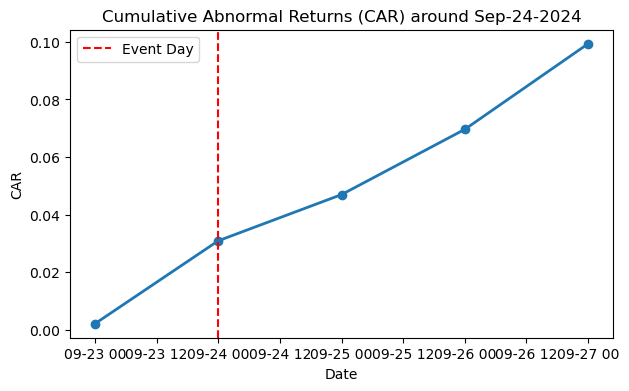

In [12]:
# ===========================
# HP1 — Event Study (Index level, versione compatta e coerente)
# ===========================

# Parametri finestra
EST_START, EST_END = -250, -30   # [-250, -30]
EV_PRE, EV_POST = 1, 5           # [-1, +5]
t0 = EVENT_DATE

# === 1) Prepara returns per Shanghai Composite e Benchmark ===
index_data = pd.concat([S_C_I, EEM], axis=1).dropna()
index_data.columns = ['China','Benchmark']
index_data['r_china'] = np.log(index_data['China'] / index_data['China'].shift(1))
index_data['r_bench'] = np.log(index_data['Benchmark'] / index_data['Benchmark'].shift(1))
index_data = index_data.dropna()

# === 2) Definisci finestre ===
estimation_sample = index_data.loc[(index_data.index < t0) &
                                   (index_data.index >= t0 + pd.Timedelta(days=EST_START))]
event_sample = index_data.loc[(index_data.index >= t0 - pd.Timedelta(days=EV_PRE)) &
                              (index_data.index <= t0 + pd.Timedelta(days=EV_POST))]

# === 3) Stima Market Model ===
X = sm.add_constant(estimation_sample['r_bench'])
y = estimation_sample['r_china']
model = sm.OLS(y, X).fit()
alpha, beta = model.params
print(f"Alpha: {alpha:.6f} | Beta: {beta:.4f}")

# === 4) Calcola AR e CAR ===
event_sample['r_hat'] = alpha + beta * event_sample['r_bench']
event_sample['AR'] = event_sample['r_china'] - event_sample['r_hat']
event_sample['CAR'] = event_sample['AR'].cumsum()

# === 5) Test di significatività ===
t_stat = (event_sample['AR'].mean() /
          (event_sample['AR'].std(ddof=1) / np.sqrt(len(event_sample))))
print(f"T-stat (mean AR): {t_stat:.3f}")

# === 6) Output e grafico ===
print("\nEvent window abnormal returns:")
display(event_sample[['r_china','r_bench','AR','CAR']])

plt.figure(figsize=(7,4))
plt.plot(event_sample.index, event_sample['CAR'], marker='o', linewidth=2)
plt.axvline(t0, color='r', linestyle='--', label='Event Day')
plt.title("Cumulative Abnormal Returns (CAR) around Sep-24-2024")
plt.ylabel("CAR")
plt.xlabel("Date")
plt.legend()
plt.show()


# **SINCHRONICITY: PEERS GROUP REGRESSION ON S_C_I**

# PRE EVENT

In [8]:

def REG_pre(stocks_ante, T, robust=False, min_obs=30):
    rows = []
    for tkr in stocks_ante.columns:
        s = stocks_ante[tkr].dropna()
        r_peers = np.log(s) - np.log(s.shift(T))         
        y = r_peers
        x = np.log(S_C_I) - np.log(S_C_I.shift(T))                       
        df = pd.concat([x, y], axis=1, join='inner').dropna()
        df.columns = ['x','y']
        if len(df) < min_obs:
            continue

        X = sm.add_constant(df['x'])
        if robust:
            reg = sm.OLS(df['y'], X).fit(cov_type='HC3')
        else:
            reg = sm.OLS(df['y'], X).fit()

        beta = reg.params['x']
        tval = reg.tvalues['x']
        pval = reg.pvalues['x']
        r2   = reg.rsquared
        sig  = '***' if pval < 0.01 else '**' if pval < 0.05 else '*' if pval < 0.10 else ''

        rows.append({
            'Ticker': tkr,
            'Beta': float(beta),
            't': float(tval),
            'p_value': float(pval),
            'Sign.': sig,
            'R2': float(r2),
            'N': int(reg.nobs)
        })

    out = pd.DataFrame(rows).set_index('Ticker').sort_index()
    return out
REG_pre(stocks_ante, 1, robust=True, min_obs=30)

,Beta,t,p_value,Sign.,R2,N
Ticker,,,,,,
600000.SS,0.416008,5.466732,4.584091e-08,***,0.114054,152
600009.SS,0.846335,7.599527,2.972159e-14,***,0.317292,152
600011.SS,0.525373,3.058649,2.223379e-03,***,0.068750,152
600015.SS,0.355867,3.424854,6.151303e-04,***,0.075253,152
600016.SS,0.406204,5.287073,1.242888e-07,***,0.151686,152
...,...,...,...,...,...,...
601888.SS,1.500398,10.019146,1.255832e-23,***,0.367932,152
601899.SS,1.069046,5.803182,6.506802e-09,***,0.183708,152
601939.SS,0.059776,0.542806,5.872632e-01,,0.002019,152


In [9]:
results_REG_pre = REG_pre(stocks_ante, 1, robust=True, min_obs=30)
sig_REG_pre = results_REG_pre[results_REG_pre['Sign.'] != '']
print("Average R²(ALL):", results_REG_pre['R2'].mean())
print("Average Beta(ALL):", results_REG_pre['Beta'].mean())
print('Average R² (significant):', sig_REG_pre['R2'].mean())
print('Average Beta (significant):', sig_REG_pre['Beta'].mean())
print(f"N. of significant stocks: {len(sig_REG_pre)} / {len(results_REG_pre)}")

Average R²(ALL): 0.22096218210628465
Average Beta(ALL): 0.8794896240595907
Average R² (significant): 0.24568368082854286
Average Beta (significant): 0.9706034027348482
N. of significant stocks: 79 / 88


# POST EVENT

In [10]:

def REG_post(stocks_post, T, robust=False, min_obs=30):
    rows = []
    for tkr in stocks_post.columns:
        s = stocks_post[tkr].dropna()
        r_peers = np.log(s) - np.log(s.shift(T))         
        y = r_peers
        x = np.log(S_C_I) - np.log(S_C_I.shift(T))                       
        df = pd.concat([x, y], axis=1, join='inner').dropna()
        df.columns = ['x','y']
        if len(df) < min_obs:
            continue

        X = sm.add_constant(df['x'])
        if robust:
            reg = sm.OLS(df['y'], X).fit(cov_type='HC3')
        else:
            reg = sm.OLS(df['y'], X).fit()

        beta = reg.params['x']
        tval = reg.tvalues['x']
        pval = reg.pvalues['x']
        r2   = reg.rsquared
        sig  = '***' if pval < 0.01 else '**' if pval < 0.05 else '*' if pval < 0.10 else ''

        rows.append({
            'Ticker': tkr,
            'Beta': float(beta),
            't': float(tval),
            'p_value': float(pval),
            'Sign.': sig,
            'R2': float(r2),
            'N': int(reg.nobs)
        })

    out = pd.DataFrame(rows).set_index('Ticker').sort_index()
    return out
REG_post(stocks_post, 1, robust=True, min_obs=30)

,Beta,t,p_value,Sign.,R2,N
Ticker,,,,,,
600000.SS,0.658267,5.699664,1.200437e-08,***,0.251584,249
600009.SS,0.846418,9.168722,4.786604e-20,***,0.659065,249
600011.SS,0.703833,11.340852,8.233933e-30,***,0.304942,249
600015.SS,0.729946,8.254333,1.527528e-16,***,0.311833,249
600016.SS,0.690797,10.250105,1.182150e-24,***,0.315952,249
...,...,...,...,...,...,...
601888.SS,1.424312,10.207092,1.843067e-24,***,0.559572,249
601899.SS,0.806945,5.000927,5.705538e-07,***,0.205908,249
601939.SS,0.270898,3.365544,7.639298e-04,***,0.071590,249


In [11]:
results_REG_post = REG_post(stocks_post, 1, robust=True, min_obs=30)
sig_REG_post = results_REG_post[results_REG_post['Sign.'] != '']
print("Average R²(All):", results_REG_post['R2'].mean())
print("Average Beta(ALL):", results_REG_post['Beta'].mean())
print('Average R² (significant):', sig_REG_post['R2'].mean())
print('Average Beta (significant):', sig_REG_post['Beta'].mean())
print(f"N. of significant stocks: {len(sig_REG_post)} / {len(results_REG_post)}")

Average R²(All): 0.3431217570448614
Average Beta(ALL): 0.9068168376368875
Average R² (significant): 0.3431217570448614
Average Beta (significant): 0.9068168376368875
N. of significant stocks: 88 / 88


# **MEC**

# *MEC before the event*

In [12]:

def MEC(stocks_ante, T, n_list=(2, 3, 4, 5)):
    var_T = (np.log(stocks_ante) - np.log(stocks_ante.shift(T))).var(numeric_only=True)

    MEC_dict = {}
    for n in n_list:
        var_Tn = (np.log(stocks_ante) - np.log(stocks_ante.shift(T * n))).var(numeric_only=True)
        MEC_dict[n] = (var_Tn / (n * var_T)).astype(float)

    # Crea DataFrame con righe = n e colonne = ticker
    MEC_df = pd.DataFrame(MEC_dict).T
    MEC_df.index.name = 'n'
    MEC_df.columns.name = 'Ticker'

    return MEC_df

MEC(stocks_ante,5)

Ticker,601398.SS,601288.SS,601988.SS,601939.SS,600036.SS,600000.SS,600016.SS,601166.SS,601818.SS,601328.SS,...,600900.SS,600606.SS,600637.SS,601360.SS,601668.SS,600422.SS,600741.SS,601336.SS,600150.SS,600297.SS
n,,,,,,,,,,,,,,,,,,,,,
2,0.746038,0.834603,0.807241,0.727005,0.893865,0.962719,0.889815,0.925181,0.781585,0.692926,...,0.922294,0.934923,0.592657,0.962338,0.614351,0.963511,0.781641,0.767147,0.767389,NaN
3,0.593038,0.676710,0.706301,0.561650,0.829487,0.870520,0.894245,0.935049,0.653252,0.451159,...,1.028683,0.967464,0.627102,0.961821,0.509643,0.969568,0.624678,0.817710,0.748020,NaN
4,0.486483,0.560441,0.578570,0.471913,0.712268,0.718884,0.741302,0.866048,0.559060,0.338133,...,0.993277,1.028222,0.608747,0.880941,0.457745,1.068541,0.559419,0.728054,0.656631,NaN
5,0.466741,0.465584,0.519674,0.414519,0.601584,0.595615,0.543347,0.781038,0.483487,0.288935,...,0.917595,0.927055,0.646002,0.776109,0.428967,1.204416,0.425925,0.645691,0.666503,NaN


In [13]:
MEC_results_pre= MEC(stocks_ante,5)
MEC_mean= pd.DataFrame(MEC_results_pre.mean(axis=1) , columns=['MEC_mean'])
MEC_mean

,MEC_mean
n,
2,0.842396
3,0.822236
4,0.777760
5,0.734682


# *MEC after the event*

In [14]:
def MEC(stocks_post, T, n_list=(2, 3, 4, 5)):
    var_T = (np.log(stocks_post) - np.log(stocks_post.shift(T))).var(numeric_only=True)

    MEC_dict = {}
    for n in n_list:
        var_Tn = (np.log(stocks_post) - np.log(stocks_post.shift(T * n))).var(numeric_only=True)
        MEC_dict[n] = (var_Tn / (n * var_T)).astype(float)

    # Crea DataFrame con righe = n e colonne = ticker
    MEC_df = pd.DataFrame(MEC_dict).T
    MEC_df.index.name = 'n'
    MEC_df.columns.name = 'Ticker'

    return MEC_df

MEC(stocks_post, 5)

Ticker,601398.SS,601288.SS,601988.SS,601939.SS,600036.SS,600000.SS,600016.SS,601166.SS,601818.SS,601328.SS,...,600900.SS,600606.SS,600637.SS,601360.SS,601668.SS,600422.SS,600741.SS,601336.SS,600150.SS,600297.SS
n,,,,,,,,,,,,,,,,,,,,,
2,0.924844,0.959975,0.785434,0.964518,0.778882,0.960995,1.041302,0.914943,0.893889,0.854861,...,1.127838,0.735004,0.840693,0.930236,0.738790,0.720780,0.865725,0.633536,0.885554,NaN
3,0.862755,0.923871,0.745325,0.893355,0.707121,0.941752,1.159675,0.939815,0.943114,0.845604,...,1.190913,0.618666,0.821520,1.063792,0.617199,0.612036,0.798821,0.516211,0.800957,NaN
4,0.849701,0.890360,0.746209,0.865557,0.647549,0.876646,1.245061,0.995879,0.966741,0.883910,...,1.203985,0.551838,0.725609,1.097345,0.524533,0.537361,0.653265,0.431411,0.737163,NaN
5,0.796974,0.849546,0.684839,0.805847,0.649619,0.815513,1.363718,1.016736,1.032479,0.886369,...,1.259589,0.564272,0.680664,1.052689,0.575680,0.457401,0.475893,0.441809,0.727356,NaN


In [15]:
MEC_results_post= MEC(stocks_post,5)
MEC_mean= pd.DataFrame(MEC_results_post.mean(axis=1) , columns=['MEC_mean'])
MEC_mean

,MEC_mean
n,
2,0.808765
3,0.775811
4,0.745830
5,0.738789


# **AUTOREGRESSION**

# *AUTOREGRESSION PRE EVENT*

In [16]:

def AR_pre(stocks_ante, T, n, robust=False, min_obs=30):
    rows = []
    for tkr in stocks_ante.columns:
        s = stocks_ante[tkr].dropna()
        r = np.log(s) - np.log(s.shift(T))         
        y = r
        x = r.shift(T * n)                          
        df = pd.DataFrame({'y': y, 'x': x}).dropna()
        if len(df) < min_obs:
            continue

        X = sm.add_constant(df['x'])
        if robust:
            res = sm.OLS(df['y'], X).fit(cov_type='HC3')
        else:
            res = sm.OLS(df['y'], X).fit()

        beta = res.params['x']
        tval = res.tvalues['x']
        pval = res.pvalues['x']
        r2   = res.rsquared
        sig  = '***' if pval < 0.01 else '**' if pval < 0.05 else '*' if pval < 0.10 else ''

        rows.append({
            'Ticker': tkr,
            'Beta': float(beta),
            't': float(tval),
            'p_value': float(pval),
            'Sign.': sig,
            'R2': float(r2),
            'N': int(res.nobs)
        })

    out = pd.DataFrame(rows).set_index('Ticker').sort_index()
    return out
AR_pre(stocks_ante, 1, 1, robust=True, min_obs=30)

,Beta,t,p_value,Sign.,R2,N
Ticker,,,,,,
600000.SS,0.012673,0.145846,0.884043,,0.000160,151
600009.SS,-0.038379,-0.450339,0.652466,,0.001475,151
600011.SS,0.042507,0.534037,0.593316,,0.001837,151
600015.SS,-0.043439,-0.416746,0.676864,,0.001848,151
600016.SS,0.052059,0.544317,0.586223,,0.002710,151
...,...,...,...,...,...,...
601888.SS,-0.096967,-1.168422,0.242637,,0.009396,151
601899.SS,-0.004112,-0.048225,0.961537,,0.000016,151
601939.SS,0.153991,1.262061,0.206927,,0.023755,151


In [17]:
result_AR_pre = AR_pre(stocks_ante, T=5, n=1, robust=True, min_obs=30)
sig_pre = result_AR_pre[result_AR_pre['Sign.'] != '']
print("Average R²(All):", result_AR_pre['R2'].mean())
print("Average Beta(ALL):", result_AR_pre['Beta'].mean())
print('Average R² (significant):', sig_pre['R2'].mean())
print('Average Beta (significant):', sig_pre['Beta'].mean())
print(f"N. of significant stocks: {len(sig_pre)} / {len(result_AR_pre)}")

Average R²(All): 0.031044575041934475
Average Beta(ALL): -0.108680524350277
Average R² (significant): 0.06945908544257008
Average Beta (significant): -0.20505833418077848
N. of significant stocks: 35 / 88


# *AUTOREGRESSION POST EVENT*

In [18]:

def AR_post(stocks_post, T, n, robust=False, min_obs=30):
    rows = []
    for tkr in stocks_post.columns:
        s = stocks_post[tkr].dropna()
        r = np.log(s) - np.log(s.shift(T))         
        y = r
        x = r.shift(T * n)                          
        df = pd.DataFrame({'y': y, 'x': x}).dropna()
        if len(df) < min_obs:
            continue

        X = sm.add_constant(df['x'])
        if robust:
            res = sm.OLS(df['y'], X).fit(cov_type='HC3')
        else:
            res = sm.OLS(df['y'], X).fit()

        beta = res.params['x']
        tval = res.tvalues['x']
        pval = res.pvalues['x']
        r2   = res.rsquared
        sig  = '***' if pval < 0.01 else '**' if pval < 0.05 else '*' if pval < 0.10 else ''

        rows.append({
            'Ticker': tkr,
            'Beta': float(beta),
            't': float(tval),
            'p_value': float(pval),
            'Sign.': sig,
            'R2': float(r2),
            'N': int(res.nobs)
        })

    out = pd.DataFrame(rows).set_index('Ticker').sort_index()
    return out
AR_post(stocks_post, 1, 1, robust=True, min_obs=30)

,Beta,t,p_value,Sign.,R2,N
Ticker,,,,,,
600000.SS,-0.133940,-1.397172,0.162362,,0.018415,248
600009.SS,0.114589,0.783095,0.433571,,0.013144,248
600011.SS,-0.103568,-1.152065,0.249294,,0.010565,248
600015.SS,-0.107575,-1.088939,0.276181,,0.011787,248
600016.SS,-0.068889,-0.742155,0.457994,,0.004779,248
...,...,...,...,...,...,...
601888.SS,0.181222,1.116471,0.264220,,0.032683,248
601899.SS,-0.009233,-0.129857,0.896680,,0.000079,248
601939.SS,-0.217379,-2.679579,0.007371,***,0.047268,248


In [19]:
result_AR_post = AR_post(stocks_post, T=5, n=1, robust=True, min_obs=30)
sig_post = result_AR_post[result_AR_post['Sign.'] != '']
print("Average R²(All):", result_AR_post['R2'].mean())
print("Average Beta(ALL):", result_AR_post['Beta'].mean())
print('Average R² (significant):', sig_post['R2'].mean())
print('Average Beta (significant):', sig_post['Beta'].mean())
print(f"N. of significant stocks: {len(sig_post)} / {len(result_AR_post)}")

Average R²(All): 0.034972091178666724
Average Beta(ALL): -0.11892556037379041
Average R² (significant): 0.05608365877193379
Average Beta (significant): -0.1804688515940969
N. of significant stocks: 52 / 88
